In [5]:
import pandas as pd
df = pd.read_csv("E:\Funding_rate_Aave\merged_crypto_data.csv")

In [7]:
df.describe()

,id,lending_rate,borrowing_rate,utilization_rate,stable_borrow_rate,high,low,close,adj_close,volume,market_cap,coin_supply
count,487675.000000,487675.000000,487675.000000,487675.000000,487675.000000,487675.000000,487675.000000,487675.000000,487675.000000,4.876750e+05,0.0,0.0
mean,257489.589753,-6.948210,-6.993978,0.092806,-7.624744,2479.657035,2447.360560,2463.879616,2463.879616,4.879314e+05,NaN,NaN
std,151890.908449,17.313302,17.452229,1.926008,18.045787,9432.305782,9317.047389,9376.023619,9376.023619,1.997177e+06,NaN,NaN
min,1.000000,-50.000000,-50.000000,-58.525084,-50.000000,0.030000,0.020000,0.030000,0.030000,0.000000e+00,NaN,NaN
25%,122567.500000,0.000003,0.002538,0.006045,0.007954,0.490000,0.480000,0.490000,0.490000,1.864000e+04,NaN,NaN
50%,267448.000000,0.000293,0.016319,0.067170,0.034076,2.300000,2.250000,2.270000,2.270000,1.364230e+05,NaN,NaN
75%,390710.500000,0.003802,0.088877,0.213107,0.064000,15.300000,15.020000,15.160000,15.160000,4.355500e+05,NaN,NaN
max,515214.000000,32.305099,55.626264,25.449307,3.130000,95000.000000,86240.000000,90500.000000,90500.000000,4.634977e+08,NaN,NaN


=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487675 entries, 0 to 487674
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  487675 non-null  int64  
 1   crypto_symbol       487675 non-null  object 
 2   date                487675 non-null  object 
 3   lending_rate        487675 non-null  float64
 4   borrowing_rate      487675 non-null  float64
 5   utilization_rate    487675 non-null  float64
 6   stable_borrow_rate  487675 non-null  float64
 7   crypto_symbol.1     487675 non-null  object 
 8   date.1              487675 non-null  object 
 9   high                487675 non-null  float64
 10  low                 487675 non-null  float64
 11  close               487675 non-null  float64
 12  adj_close           487675 non-null  float64
 13  volume              487675 non-null  int64  
 14  market_cap          0 non-null       float64
 15  coin_supply

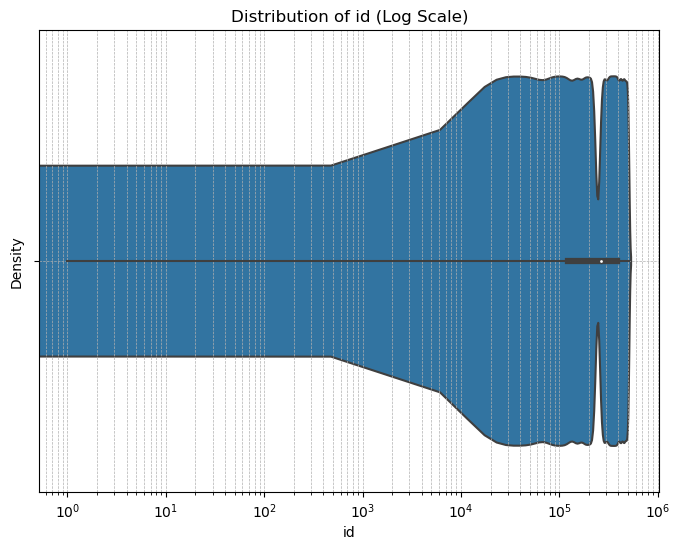

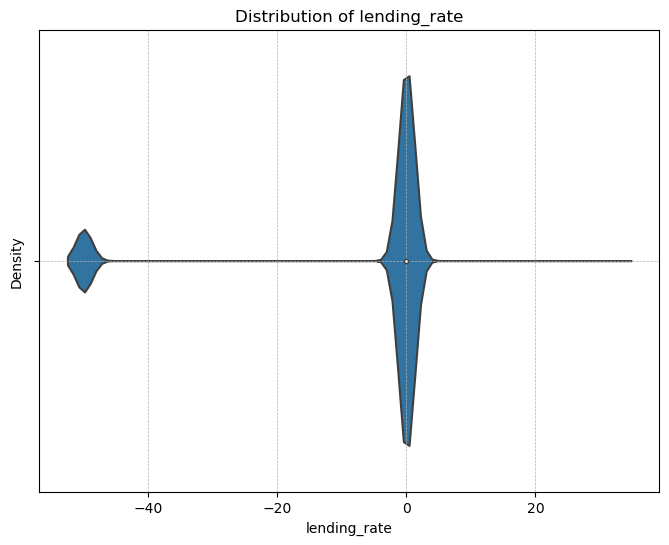

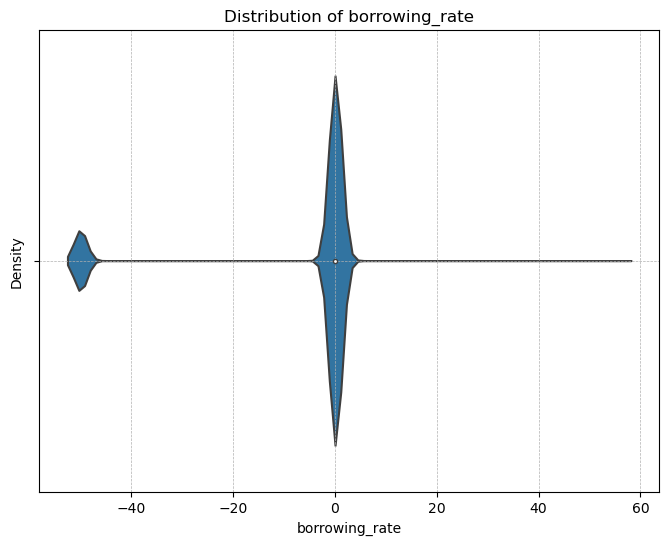

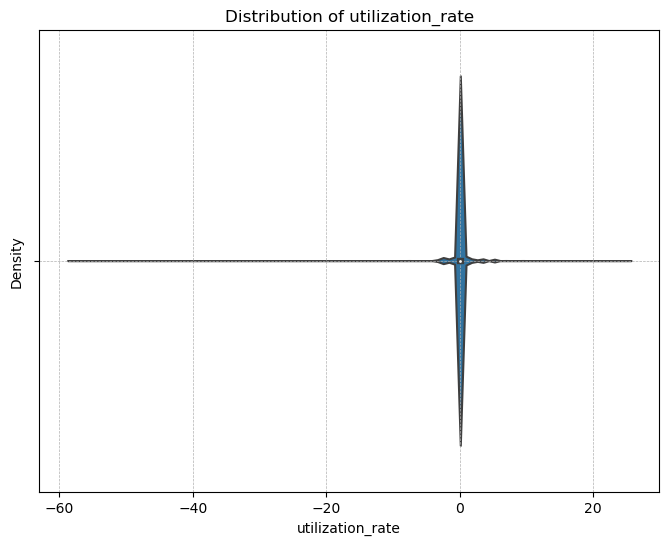

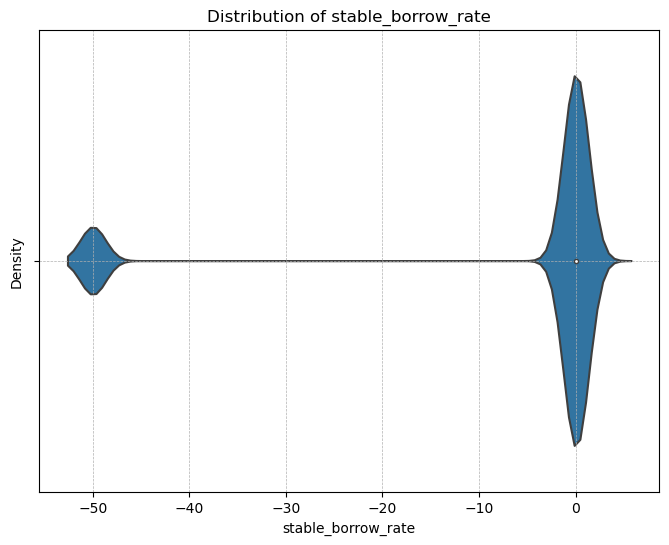

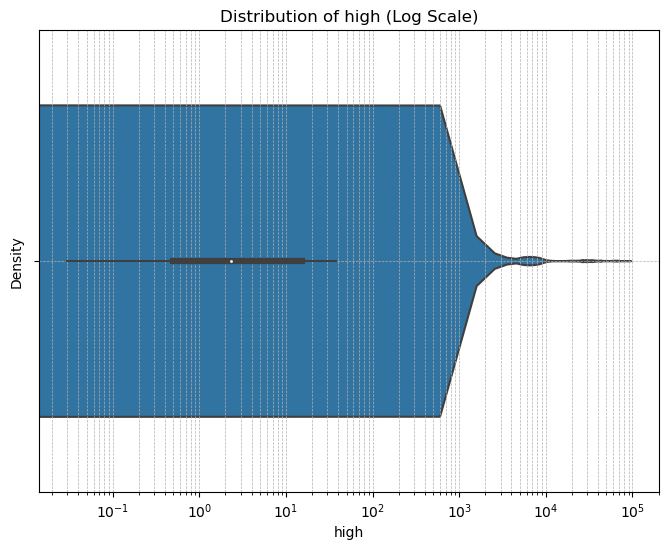

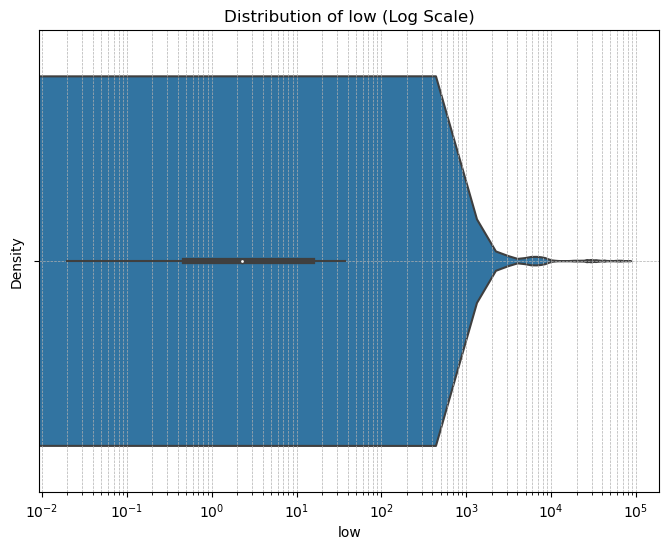

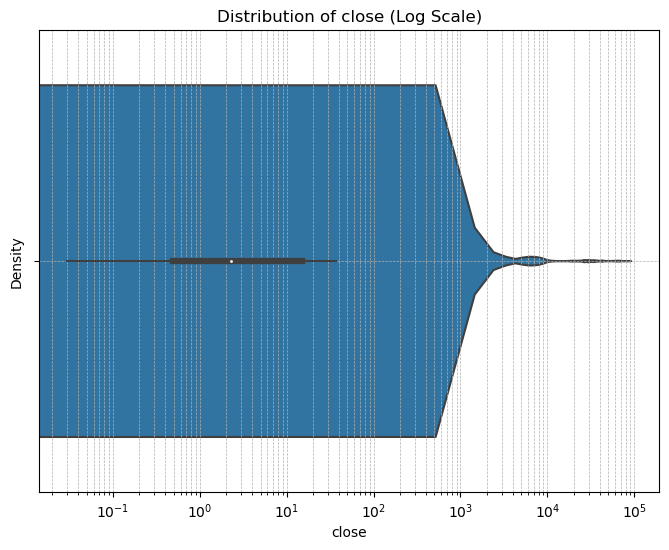

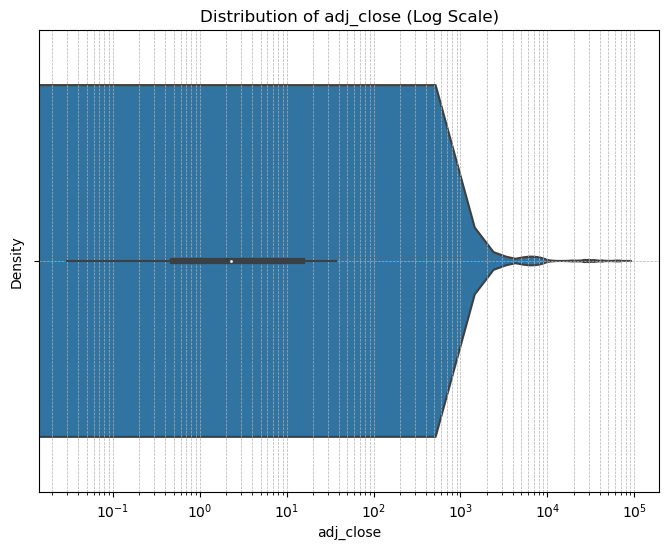

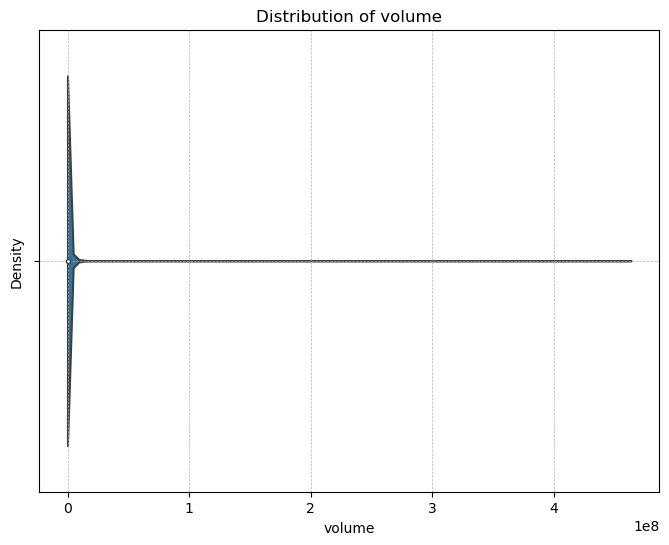

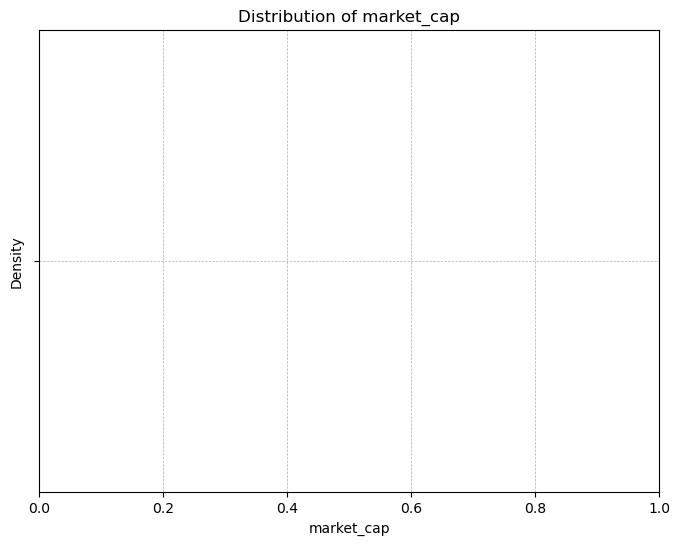

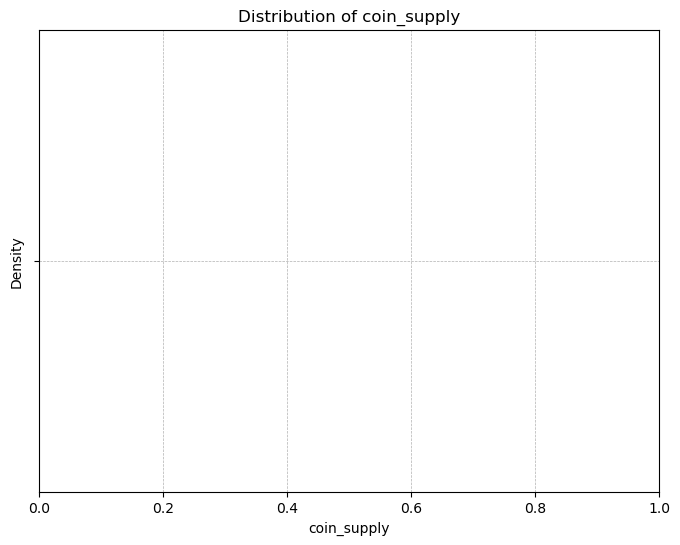

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_dataframe(df):
    """
    自动化分析和可视化 Pandas DataFrame 的函数。
    包括以下功能：
    - 打印 df.describe、df.info 和 df.columns。
    - 显示缺失值和零值统计。
    - 对数值列生成小提琴图以展示分布。

    参数：
        df (pd.DataFrame): 输入的 DataFrame。
    """
    # 打印基本信息
    print("=== DataFrame Info ===")
    print(df.info())
    print("\n=== DataFrame Describe ===")
    print(df.describe(include='all'))
    print("\n=== DataFrame Columns ===")
    print(df.columns)
    
    # 缺失值统计
    print("\n=== Missing Values ===")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    # 零值统计（针对数值型列）
    print("\n=== Zero Values ===")
    zero_values = (df == 0).sum()
    print(zero_values[zero_values > 0])
    
    # 可视化每一数值列的小提琴图
    num_cols = df.select_dtypes(include=['number']).columns
    for col in num_cols:
        plt.figure(figsize=(8, 6))
        sns.violinplot(data=df, x=col)
        
        # 设置 x 轴对数缩放（对非零列生效）
        if (df[col] > 0).all():  # 确保所有值均为正数，才能使用对数缩放
            plt.xscale('log')
        
        # 添加网格
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        plt.title(f"Distribution of {col} (Log Scale)" if (df[col] > 0).all() else f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.show()

# 示例用法
# 读取数据
visualize_dataframe(df)
